## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## membuat random data

In [2]:
gaji = np.random.normal(3500000, 1500000, 100)
pengeluaran = np.random.normal(2000000, 500000, 100)
hutang = np.random.normal(1000000, 500000, 100)
tanggungan = np.random.randint(1,5,100)

In [5]:
tanggungan

array([4, 4, 2, 2, 4, 4, 1, 2, 1, 2, 4, 3, 1, 2, 4, 4, 2, 1, 4, 4, 3, 3,
       3, 1, 3, 1, 1, 2, 1, 3, 2, 2, 1, 1, 2, 4, 2, 2, 3, 3, 2, 1, 4, 4,
       3, 4, 3, 1, 2, 1, 4, 3, 4, 2, 2, 4, 4, 2, 3, 4, 1, 1, 3, 4, 3, 1,
       2, 2, 4, 3, 3, 4, 4, 3, 2, 3, 1, 1, 3, 4, 3, 4, 4, 4, 2, 4, 1, 1,
       1, 2, 4, 3, 4, 1, 3, 3, 3, 3, 4, 1])

In [6]:
df = pd.DataFrame({'Gaji':gaji,'Pengeluaran':pengeluaran,'Hutang':hutang,'Tanggungan':tanggungan})
df.head()

,Gaji,Pengeluaran,Hutang,Tanggungan
0,3.252492e+06,2.175609e+06,2.017205e+06,4
1,1.726413e+06,1.872185e+06,5.819439e+05,4
2,3.392844e+06,2.066672e+06,6.712601e+05,2
3,2.949993e+06,2.168767e+06,8.342577e+05,2
4,4.803121e+06,2.225272e+06,-2.067396e+04,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gaji         100 non-null    float64
 1   Pengeluaran  100 non-null    float64
 2   Hutang       100 non-null    float64
 3   Tanggungan   100 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


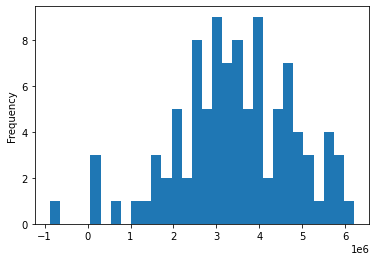

In [9]:
df.Gaji.plot(kind='hist', bins=30);

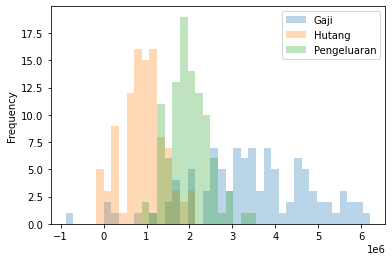

In [15]:
df[['Gaji', 'Hutang', 'Pengeluaran']].plot(kind='hist', bins=40, alpha=0.3);

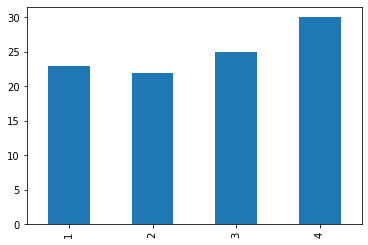

In [16]:
df.Tanggungan.value_counts().sort_index().plot(kind='bar');

In [18]:
df['Total_spending'] = df['Hutang'] + df['Pengeluaran']
df['Tabungan'] = df['Gaji'] - df['Total_spending']

In [19]:
df.head()

,Gaji,Pengeluaran,Hutang,Tanggungan,Total_spending,Tabungan
0,3.252492e+06,2.175609e+06,2.017205e+06,4,4.192814e+06,-9.403217e+05
1,1.726413e+06,1.872185e+06,5.819439e+05,4,2.454129e+06,-7.277161e+05
2,3.392844e+06,2.066672e+06,6.712601e+05,2,2.737932e+06,6.549118e+05
3,2.949993e+06,2.168767e+06,8.342577e+05,2,3.003025e+06,-5.303130e+04
4,4.803121e+06,2.225272e+06,-2.067396e+04,4,2.204598e+06,2.598524e+06


In [20]:
df.iloc[1]

Gaji              1.726413e+06
Pengeluaran       1.872185e+06
Hutang            5.819439e+05
Tanggungan        4.000000e+00
Total_spending    2.454129e+06
Tabungan         -7.277161e+05
Name: 1, dtype: float64

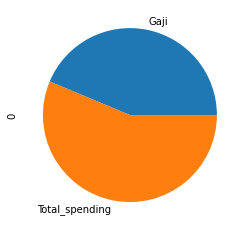

In [21]:
df.iloc[0][['Gaji', 'Total_spending']].plot(kind='pie');

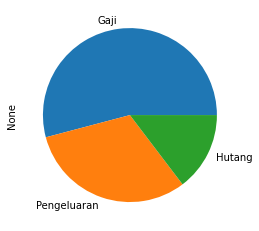

In [22]:
df.mean()['Gaji':'Hutang'].plot(kind='pie')

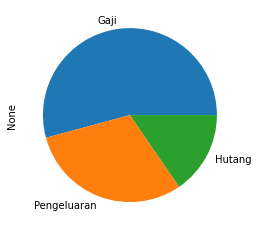

In [23]:
df.median()['Gaji':'Hutang'].plot(kind='pie')

## Time Series

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv')
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [26]:
opsd_daily.shape

(4383, 5)

In [27]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [28]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [29]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [30]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [31]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [32]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [33]:
opsd_daily.Weekday = opsd_daily.Weekday.map({0:'Monday',
                                             1:'Tuesday',
                                             2:'Wednesday',
                                             3:'Thursday',
                                             4:'Fryday',
                                             5:'Saturday',
                                             6:'Sunday',})

In [34]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [35]:
opsd_daily.loc['2016-04-19':'2016-04-25']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2016-04-19,1452.976,395.765,127.562,523.327,2016,4,Tuesday
2016-04-20,1438.061,181.417,191.526,372.943,2016,4,Wednesday
2016-04-21,1433.142,101.879,208.647,310.526,2016,4,Thursday
2016-04-22,1410.083,149.515,171.500,321.015,2016,4,Fryday
2016-04-23,1208.184,197.282,89.694,286.976,2016,4,Saturday
2016-04-24,1126.023,174.225,136.642,310.867,2016,4,Sunday
2016-04-25,1456.440,258.048,119.736,377.784,2016,4,Monday


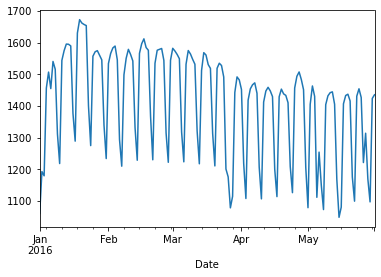

In [36]:
opsd_daily.loc['2016-01-01':'2016-05-31']['Consumption'].plot();

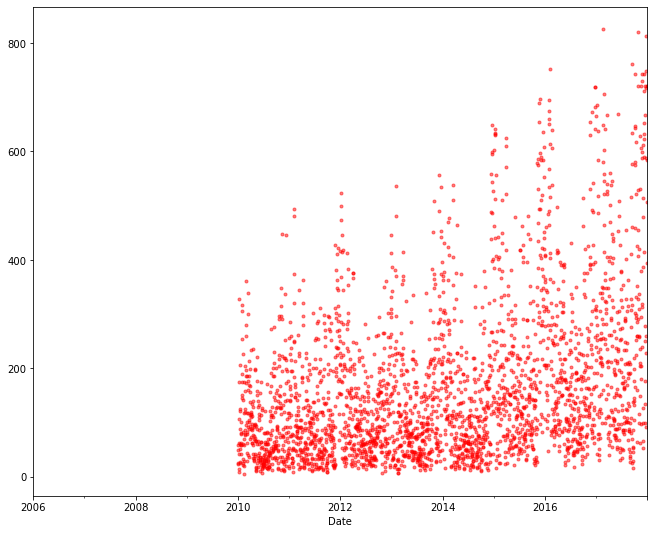

In [37]:
opsd_daily['Wind'].plot(marker='.', color='red', linestyle='None', alpha=0.5, figsize=(11,9));

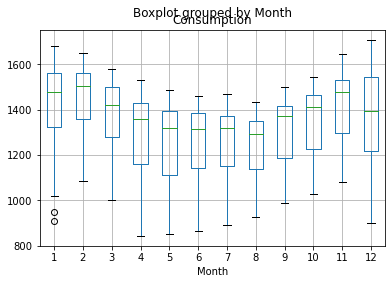

In [38]:
opsd_daily.boxplot(column=['Consumption'], by='Month');

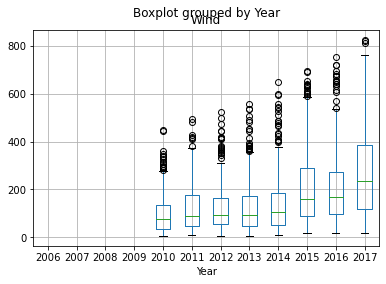

In [39]:
opsd_daily.boxplot(column=['Wind'], by='Year');

## Sactter Plot

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.arange(0,10)
Y = X**2

In [41]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
Y

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [43]:
df_lin = pd.DataFrame({'X':X, 'Y':Y})
df_lin

,X,Y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


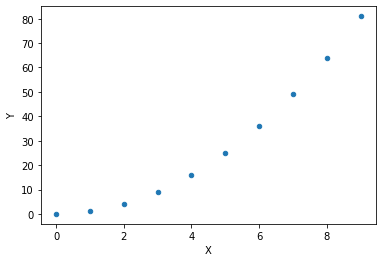

In [44]:
df_lin.plot(kind='scatter', x='X', y='Y');

In [45]:
print(X)
print(Y)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]
